# **Waze app User Churn Project**

# Introduction
Welcome to the Waze Project!

Please join me as I embark into a detailed analysis of user behavior on Waze, an app that guides millions to their destinations safely and efficiently. While Waze is a travel companion for many, there is a constant challenge of keeping the users engaged to prevent churn - defined as when users stop using the app.

While the overarching aim is to decode the reasons behind users' discontinuation from using Waze, this project focuses on analyzing the relationship between the mean number of rides and device type. Specifically, the leadership at Waze is eager to determine whether a statistically significant difference exists in the mean number of rides between iPhone® users and Android™ users. To investigate this query, a two-sample Hypothesis Test (t-test) is employed, analyzing the difference in the mean number of rides between users of the two platforms.

Follow me on this exciting journey as I navigate through the data, unearthing valuable insights into user behavior and driving preferences across different device platforms!



***PS. For a snapshot of the project, please refer to the*** [Executive Summary](https://docs.google.com/presentation/d/1pU2vm_nDcQgG1N-pioFL_IJ4WleWW100nERStDCIbWI/edit?usp=sharing&resourcekey=0-yd_P5p-R78m3-ezD3sRkkg).

### **This project has three parts**



**Part 1:** Imports and Exploratory Data Analysis (EDA)
* Import data and necessary packages for subsequent analysis and Hypothesis Testing. 

**Part 2:** Conduct Hypothesis testing
* Compute Descriptive Statistics.

* Formulate the Null and Alternative Hypotheses. 

**Part 3:** Communicate insights with stakeholders
* Communicate findings to the Waze Leadership.


# **Part 1. Imports, data loading and Exploratory Data Analysis** 

In this section, I will initialize the Python environment with the necessary libraries required for analysis. Subsequently, I will load the dataset and convert it into a format conducive to data manipulation and analysis. Additionally, an initial analysis will be conducted to comprehend the underlying characteristics of the dataset.

In [6]:
# Importing the required packages and libraries 

import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [7]:
# Loading the dataset into a dataframe

df = pd.read_csv('C:/Users/Owner/Desktop/PYTHON/advncd google analytics/The Power of Statistics/waze_dataset.csv')


In [8]:
# Verifying and validating that the dataset was loaded properly

print(f'The number of rows in the dataset are: {df.shape[0]}')
print(f'The number of columns in the dataset are: {df.shape[1]}')

The number of rows in the dataset are: 14999
The number of columns in the dataset are: 13


In [9]:
# Generating the top five rows of the dataframe to get a preliminary understanding of the dataset

df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [10]:
# Generating Summary Statistics for the numerical variables in the dataset

df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [11]:
# Checking for misssing values in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [12]:
# The label column is the only column which has missing values
# Calculating the percentage of missing values in the label column  

is_null = df['label'].isnull().sum()
percentage = is_null/df.shape[0] * 100
print(f"The percentage of missing values in the label column is: {percentage}") 

# The percentage is less than 5%, so it might not significantly impact the analysis in this context

The percentage of missing values in the label column is: 4.666977798519902


***For a comprehensive Exploratory Data Analysis (EDA) and detailed visualizations of the dataset, please refer to a previously compiled notebook***. [Please click on the following link for detailed EDA & visualizations](https://github.com/3quraishi/Waze-EDA-and-User-Churn-Analysis/blob/main/Waze%20Portfolio%20Project.ipynb). In this current notebook, we will build upon that groundwork and delve further into Hypothesis Testing and subsequent analyses.

Having established the context and provided a link to the detailed EDA, let's get into the specifics of our objective and the preparatory steps needed for our Hypothesis Testing.

**Note:** In the dataset, `device` is a categorical variable with the labels `iPhone` and `Android`.

* For computations involved in a t-test, numerical data is necessary. The t-test is inherently a method for comparing means, and means can only be calculated from numerical data. Therefore, we need to convert the categorical labels to numbers.

In [13]:
# Creating a numerical representation for device types
# I've decided to use the following mapping, Android: 2, iPhone: 1

map_dictionary = {'Android': 2, 'iPhone' : 1}

# Duplicating the device column

df['device_type'] = df['device']

# Mapping the labels to their numerical representation

df['device_type'] = df['device'].map(map_dictionary)

Using Box Plots, I compare the distributions of the number of rides between Android and iPhone users side by side. This will help identify any outliers and visualize the median and IQR for both groups.

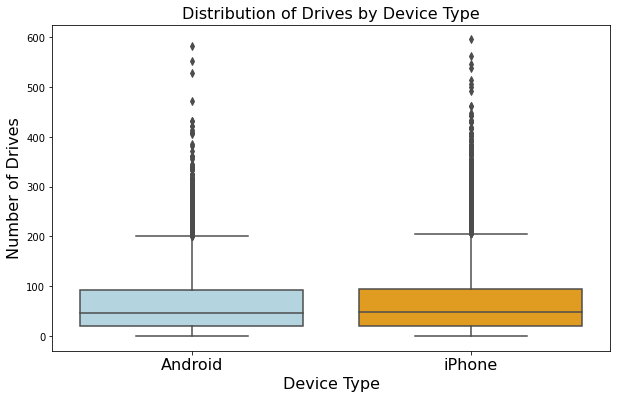

In [14]:
# Creating the box plot

colors = ['#ADD8E6', 'orange']# 'ADD8E6' is the HEX code for light blue

# Displaying the bar plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='device_type', y='drives', data=df, palette=colors, order=[2, 1])# 2 for Android & 1 for iPhone as per mapping

# Adding the title and labels
plt.title('Distribution of Drives by Device Type', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Android', 'iPhone'], fontsize=16)
plt.xlabel('Device Type', fontsize=16)
plt.ylabel('Number of Drives', fontsize=16)
plt.show()

The box plots reveal almost identical distributions of drives for both Android and iPhone users. The median, interquartile range, and overall spread of the data are nearly indistinguishable between the two groups. The median, interquartile range, and overall spread of the data are almost the same between the two groups. This suggests that, in terms of the number of drives, user behavior is consistent across both device platforms - **but, this is exactly what I need to confirm using Hypothesis testing**.

While the visual representations offer compelling insights, it's crucial to delve deeper into the quantitative specifics. By analyzing the actual mean values associated with each device type, I can further solidify my observations and attain a more thorough understanding.

As I investigate further, I'm keen to understand the direct correlation between device type and the frequency of drives. To shed light on this, I've computed the average number of drives associated with each device type.

In [15]:
# Calculating the average drives or ridership by device type

android_mean = df[df['device_type'] == 2]['drives'].mean()
iphone_mean = df[df['device_type'] == 1]['drives'].mean()

print(f"Android mean: {android_mean}")
print(f"iPhone mean: {iphone_mean}")

Android mean: 66.23183780739629
iPhone mean: 67.85907775020678


In [16]:
# Using the groupby method to calculate the average drives or ridership by device type

averages = df.groupby('device_type')['drives'].mean()
print(averages)

device_type
1    67.859078
2    66.231838
Name: drives, dtype: float64


**Note:**  Both methods are used to calculate the mean ridership by device type. The first approach calculates the mean for each device type separately by filtering the DataFrame for each device and then computing the mean. The second approach uses the groupby method, which automatically groups the data by unique device types and calculates the mean for each group. Despite the different approaches, both methods yield the same result, verifying the consistency and accuracy of my computations.

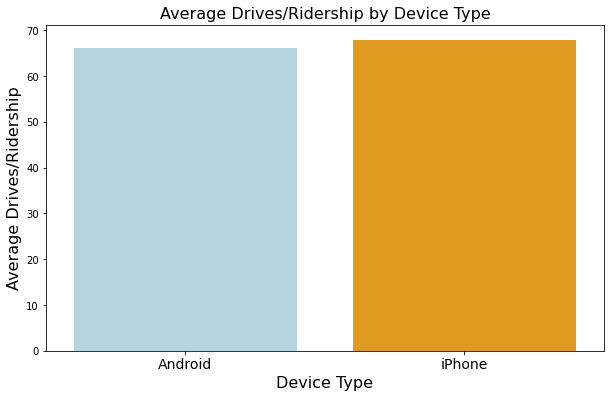

In [17]:
# Creating the bar plot
devices = ['Android', 'iPhone']
mean_values = [android_mean, iphone_mean]
colors = ['#ADD8E6', 'orange']  # 'ADD8E6' is the HEX code for light blue

# Displaying the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=devices, y=mean_values, palette=colors)

# Adding the title and labels
plt.title('Average Drives/Ridership by Device Type', fontsize=16)
plt.xlabel('Device Type',fontsize=16)
plt.ylabel('Average Drives/Ridership', fontsize=16)
plt.xticks(fontsize=14)
plt.show()

Based on the averages shown, it appears that drivers who use an iPhone device to interact with the app have a slightly higher number of drives on average. However, this difference might arise from random sampling, rather than being a true difference in the number of drives. To assess and confirm whether the difference is statistically significant, we will conduct a Hypothesis Test.

# **Part 2. Conduct Hypothesis Testing**

The goal is to conduct a two-sample t-test. The **rationale** for using a **two-sample t-test** is the following:
We are interested in determining if there's a significant difference in the mean number of rides between iPhone users and Android users. This involves comparing the means of two independent groups (iPhone users and Android users), making it a perfect candidate for a two-sample t-test. A one-sample t-test wouldn't be appropriate here because we aren't comparing one group's mean to a known or hypothesized value; instead, we're comparing the means of two separate groups.

The steps for conducting a Hypothesis Test:

1.   State the Null Hypothesis and the Alternative Hypothesis
2.   Choose a significance level
3.   Perform the test and find the p-value
4.   Reject or fail to reject the Null Hypothesis

**Stating the Hypotheses:**

$H_0$ (Null Hypothesis): There is no difference between the average drives between Android and iPhone users.


$H_a$ (Alternate Hypothesis): There is a difference between average drives between Android and iPhone users.

**Significance level:**

I have chosen 5% as the significance level for the two-sample t-test.

**Performing the t-test:**

In [18]:
# Isolating the drives column for iPhone users

drivesiPhone = df[df['device_type'] == 1]['drives']

# Isolating the drives column for Android users

drivesAndroid = df[df['device_type'] == 2]['drives']

# Performing the t-test

stats.ttest_ind(a=drivesiPhone, b=drivesAndroid, equal_var=False)

Ttest_indResult(statistic=1.4635232068852353, pvalue=0.1433519726802059)

The p-value obtained from the t-test is 0.1433 (or 14.33%). This is greater than the significance level of 0.05 (or 5%). Therefore, we fail to reject the Null Hypothesis. From the t-test, we can conclude that there is no statistically significant difference in the mean drives between Android and iPhone users.

# **Task 3. Communicating insights with stakeholders**

- **Drivers who use iPhone® to use the app have similar number of drives as those who use Android™.**


- **Examine platform features or pain points to enhance user experience and boost retention.**


- **Analyze in-app metrics to pinpoint trends that guide user engagement, conducting t-tests where necessary.**

# Next steps

➡️ User Feedback Collection: Initiate surveys or feedback sessions specifically targeting iPhone and Android users to understand any platform-specific preferences or issues.

➡️ Feature Enhancement: Based on the feedback and the in-app metrics analysis, prioritize the development of features that can potentially boost user engagement and satisfaction.

➡️ Further Statistical Analysis: As we uncover more about user behaviors and preferences, design and conduct additional hypothesis tests to ensure our strategies are validated with statistical rigor.

➡️ Machine Learning: Churn Prediction Model - develop a predictive model to identify users who are likely to churn in the near future. This allows for targeted interventions, such as sending personalized offers or notifications to re-engage them. User Segmentation - use clustering algorithms to segment the user base into distinct groups based on their behavior. This can help in tailoring marketing campaigns or app features to specific segments.